In [2]:
import os

%load_ext rpy2.ipython 
# import vamb
# %config IPCompleter.greedy=True
%config Completer.use_jedi = True
# %load_ext rpy2.ipython

In [3]:
import pandas as pd
import numpy as np

In [4]:
%ls ../


Ant_1/         align_log.tsv  my_interproscan/  see_some_results/  trees/
Bact_comm_4x/  ant_1/         ncbi/             server1_arc/       waypipe/
CheckM/        ant_1_tree/    notebooks/        somebases/
al_R/          metagenome/    plates/           temp/


### Фильтр:
+ то что не прошло IQ-tree
+ хлоропласты и митохондрии
    + неидентифицировано
    + не проходит diamond
    + минор
    + длина отличается

In [5]:
%cd ~/storage/trees/nal/
!ls -htl | head

/mnt/storage/trees/nal
total 63M
-rw-rw-r-- 1 gladkov2 gladkov2 541K Apr 14 11:45 iqtee_chi_al1_1.tsv
drwxrwxr-x 3 gladkov2 gladkov2 4.0K Apr 13 14:11 test
-rw-rw-r-- 1 gladkov2 gladkov2 718K Apr 13 14:00 al_1_1.log
-rw-rw-r-- 1 gladkov2 gladkov2  20M Apr  2 14:06 al_d_2.fasta
-rw-rw-r-- 1 gladkov2 gladkov2  37M Apr  2 11:57 al_1.fasta
-rw-r--r-- 1 gladkov2 gladkov2 796K Nov 20 12:01 ps.rds
-rw-r--r-- 1 gladkov2 gladkov2 4.1M Nov 19 15:42 rep_seq.fasta
-rw-r--r-- 1 gladkov2 gladkov2 1.3M Nov 19 15:42 taxa.txt
-rw-r--r-- 1 gladkov2 gladkov2 5.5K Nov 19 15:42 track.tsv


In [6]:
%%R

a <- list.files()

In [8]:
!mafft --auto --thread 50 --inputorder "rep_seq.fasta" > "al_1.fasta"

nthread = 50
nthreadpair = 50
nthreadtb = 16
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
 16101 / 16159 (thread   45)
done.

Constructing a UPGMA tree (efffree=0) ... 
 16150 / 16159
done.

Progressive alignment 1/2... 
STEP  14601 / 16158 (thread   15) h
Reallocating..done. *alloclen = 1662
STEP  16001 / 16158 (thread   15) h
Reallocating..done. *alloclen = 2702
STEP  16101 / 16158 (thread    1)
Reallocating..done. *alloclen = 3724

done.

Making a distance matrix from msa.. 
 16100 / 16159 (thread   15)
done.

Constructing a UPGMA tree (efffree=1) ... 
 16150 / 16159
done.

Progressive alignment 2/2... 
STEP  15101 / 16158 (thread    1) h
Reallocating..done. *alloclen = 1641
STEP  16101 / 16158 (thread    8) h
Reallocating..done. *alloclen = 2677

Reallocating..done. *alloclen = 3688

done.

disttbfast (nuc) Version 7.475
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (

In [21]:
!ls -htl

total 61M
-rw-rw-r-- 1 gladkov2 gladkov2  20M Apr  2 14:06 al_d_2.fasta
-rw-rw-r-- 1 gladkov2 gladkov2  37M Apr  2 11:57 al_1.fasta
-rw-r--r-- 1 gladkov2 gladkov2 796K Nov 20 12:01 ps.rds
-rw-r--r-- 1 gladkov2 gladkov2 4.1M Nov 19 15:42 rep_seq.fasta
-rw-r--r-- 1 gladkov2 gladkov2 5.5K Nov 19 15:42 track.tsv


In [22]:
!head -n 50 al_1.fasta

>Seq1
------------------------------------------acgtaggtg---------
---------------------gc-------------aagcg-------------------
------------------------------------------------------------
-------------------ttgtc--cg------------------------------ga
at-------------------------------------tat----t-----gg-g-cg-
t-------------aa-ag-----------------------------------------
--------cg-cgc--gc-a-------------------------gg-cgg-tc-c-t-t
---------------------------t-------------------------------a
----------a---------------------------------------------gtc-
--------------t-g-a-t-------------------------------------gt
-------------------------------------g----------------------
---------------------------------------------aa-------------
-----------a-----------------------g--c-cc-------a-c-g------
-gc-tca------------------------acc-----------gtg------------
--gaggg---------tca-t---------------------------------------
-----------------------------t-g----g--------aaa------------
------------------

In [11]:
%%R

library(DECIPHER)
dna <- readDNAStringSet("rep_seq.fasta")
head(dna)
alignment <- AlignSeqs(DNAStringSet(dna), anchor=NA,verbose=FALSE, processors = 50)
writeXStringSet(alignment, file="al_d_2.fasta")

In [23]:
!head -n 50 al_d_2.fasta

>Seq1
----------------ACGTAG----------GTG------GCAA------GCGTT-------GTCCGGAATT----A--
--TT---G-----G-----G----CG----------TAA---AGCG------CG----CG-----CA-------GGC---
---GG------TC----C------------T--T------------------------------------------T---
--AAG------------------------------------------------TC--T-----G-----A----T-----
---------------G------TGA--------------AAG----C----CCAC------GG--------C-----TCA
ACC--G--T-----G-G---------A----G---------GGT-----CA---T-------T-G---GAA--------A
CT-----G--G-G--G------G--A---C--T--------T----G---A--------G----TGC---A-----GGA-
----GAGAA------GA----GTG------G------------AA-----TT----CCA----------------C----
-GTG----T-----A---G-------CGG----T------GAAAT-------GCG---T-------AG------AGAT--
--GT-----------GGAGGA------ACA------CCA---G---T-------G------GC-----GAA-------GG
CG----AC-----TCT-----TTG------G---C--CT-----------------------------------------
---------------------------G-------------------------------------------TA-------
----------------------

In [28]:
!timeout 5 iqtree -s al_1.fasta --prefix al_1_1

IQ-TREE multicore version 2.1.2 COVID-edition for Linux 64-bit built Mar 30 2021
Developed by Bui Quang Minh, James Barbetti, Nguyen Lam Tung,
Olga Chernomor, Heiko Schmidt, Dominik Schrempf, Michael Woodhams.

Host:    8753872069ef (AVX512, FMA3, 2708 GB RAM)
Command: iqtree -s al_1.fasta --prefix al_1_1
Seed:    223647 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue Apr 13 14:00:36 2021
Kernel:  AVX+FMA - 1 threads (208 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 208 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file al_1.fasta ... Fasta format detected
Alignment most likely contains DNA/RNA sequences
Alignment has 16159 sequences with 2323 columns, 2094 distinct patterns
1668 parsimony-informative, 290 singleton sites, 364 constant sites
          Gap/Ambiguity  Composition  p-value
   1  Seq1       89.15%    passed     16.22%
   2  Seq2       89.15%    p

In [30]:
!grep chi al_1_1.log

****  TOTAL      89.23%  3988 sequences failed composition chi2 test (p-value<5%; df=3)


In [62]:
!rm iqtee_chi_al1_1.tsv

In [72]:
!grep Seq al_1_1.log | sed 's/^ *//g' | sed 's/ \+ /\t/g' > iqtee_chi_al1_1.tsv

In [36]:
df = pd.read_csv("iqtee_chi_al1_1.tsv", delimiter='\t', header = None)
df

,0,1,2,3,4
0,1,Seq1,89.15%,passed,16.22%
1,2,Seq2,89.15%,passed,22.21%
2,3,Seq3,89.15%,passed,22.49%
3,4,Seq4,92.81%,failed,1.06%
4,5,Seq5,89.15%,passed,25.56%
...,...,...,...,...,...
16154,16155,Seq16155,86.31%,passed,37.86%
16155,16156,Seq16156,86.31%,passed,27.84%
16156,16157,Seq16157,88.81%,failed,3.59%
16157,16158,Seq16158,90.74%,passed,6.29%


In [37]:
df.columns = ['somenumber', 'Id', 'Gap_Ambiguity', 'Composition', 'p-value']
# df_filt = df.query('Composition =="passed"')
df_filt = df[['Id', 'Composition']]
df_filt

,Id,Composition
0,Seq1,passed
1,Seq2,passed
2,Seq3,passed
3,Seq4,failed
4,Seq5,passed
...,...,...
16154,Seq16155,passed
16155,Seq16156,passed
16156,Seq16157,failed
16157,Seq16158,passed


In [ ]:
# df.Id.to_csv(".txt", sep='\t', index=False, header=False)

In [38]:
df_taxa = pd.read_csv("taxa.txt", delimiter='\t')
df_taxa = df_taxa.rename(columns={"Unnamed: 0":"Id"})
df_mix = df_taxa.merge(df_filt, on='Id')
df_mix['Res'] = np.where(((df_mix['Composition']=="failed") |
                            (df_mix['Order']=="Chloroplast") |
                            (df_mix['Family']=="Mitochondria")) ,False, True)
df_mix

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Composition,Res
0,Seq1,Bacteria,Firmicutes,Bacilli,Bacillales,Planococcaceae,NaN,longiquaesitum,passed,True
1,Seq2,Bacteria,Firmicutes,Bacilli,Bacillales,NaN,NaN,NaN,passed,True
2,Seq3,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NaN,NaN,NaN,passed,False
3,Seq4,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False
4,Seq5,Archaea,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,NaN,NaN,passed,True
...,...,...,...,...,...,...,...,...,...,...
16154,Seq16155,Bacteria,Planctomycetota,Planctomycetes,Gemmatales,Gemmataceae,Telmatocola,NaN,passed,True
16155,Seq16156,Bacteria,Chloroflexi,Ktedonobacteria,C0119,NaN,NaN,NaN,passed,True
16156,Seq16157,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False
16157,Seq16158,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,passed,True


In [159]:
len(df_filt.query('Composition == "failed"'))

3988

In [154]:
len(df_mix.query('Res == True'))

11909

In [153]:
len(df_taxa)

16159

In [177]:
df_taxa['Phylum'].isna().sum()
# df_taxa.groupby(['Phylum']).Id.count()

1460

In [178]:
# df_taxa.groupby(['Kingdom']).Id.count()
df_taxa['Kingdom'].isna().sum()

235

In [3]:
%%R

list.files()

UsageError: Cell magic `%%R` not found.


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np
import pandas as pd
import math 

/home/gladkov2/anaconda3/envs/tree/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

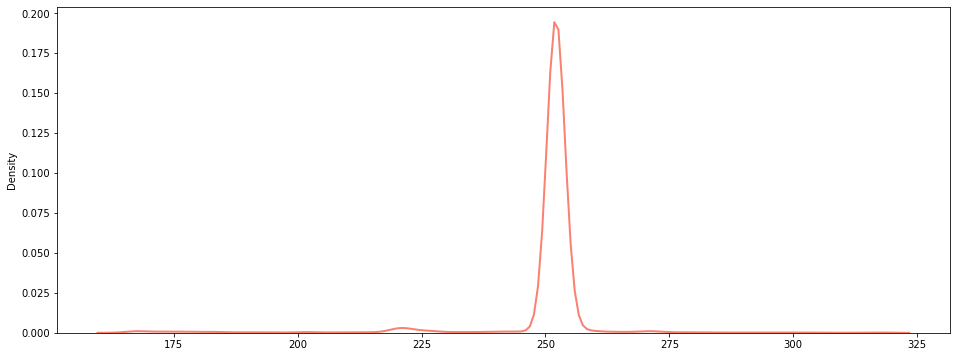

In [9]:
path = "rep_seq.fasta"

sizes = [len(rec) for rec in SeqIO.parse(path, 'fasta')]




In [88]:
df_otus = pd.read_csv("otu_table.txt", delimiter='\t')
abundance = df_otus.sum(axis=1).tolist()
Id = df_filt.Id.tolist()
Kin = df_mix.Kingdom.tolist()
df_ill = pd.DataFrame({'len':sizes, 'abu':[math.log(x, 2) for x in abundance] ,'kin':Kin})


In [48]:
df_ill.loc[(df_ill['abu'] > 10000) & (df_ill['len'] < 200)]

,len,abu,id
3,167,22835,Seq4
7,168,18599,Seq8


In [52]:
df_mix.loc[(df_mix['Id'] == 'Seq4') | (df_mix['Id'] == 'Seq8') ]

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Composition,Res
3,Seq4,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False
7,Seq8,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False


In [ ]:
df_ill.loc[(df_ill['abu'] > 10000) & (df_ill['len'] < 200)]

In [68]:
df_mix['len'] = sizes
df_mix['abu'] = [math.log(x, 2) for x in abundance]
df_mix

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Composition,Res,len,abu
0,Seq1,Bacteria,Firmicutes,Bacilli,Bacillales,Planococcaceae,NaN,longiquaesitum,passed,True,252,15.350732
1,Seq2,Bacteria,Firmicutes,Bacilli,Bacillales,NaN,NaN,NaN,passed,True,252,14.813380
2,Seq3,Bacteria,Cyanobacteria,Cyanobacteriia,Chloroplast,NaN,NaN,NaN,passed,False,252,14.800445
3,Seq4,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False,167,14.478959
4,Seq5,Archaea,Crenarchaeota,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,NaN,NaN,passed,True,252,14.365092
...,...,...,...,...,...,...,...,...,...,...,...,...
16154,Seq16155,Bacteria,Planctomycetota,Planctomycetes,Gemmatales,Gemmataceae,Telmatocola,NaN,passed,True,318,0.000000
16155,Seq16156,Bacteria,Chloroflexi,Ktedonobacteria,C0119,NaN,NaN,NaN,passed,True,318,0.000000
16156,Seq16157,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,failed,False,260,0.000000
16157,Seq16158,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,passed,True,215,0.000000


<AxesSubplot:xlabel='len', ylabel='abu'>

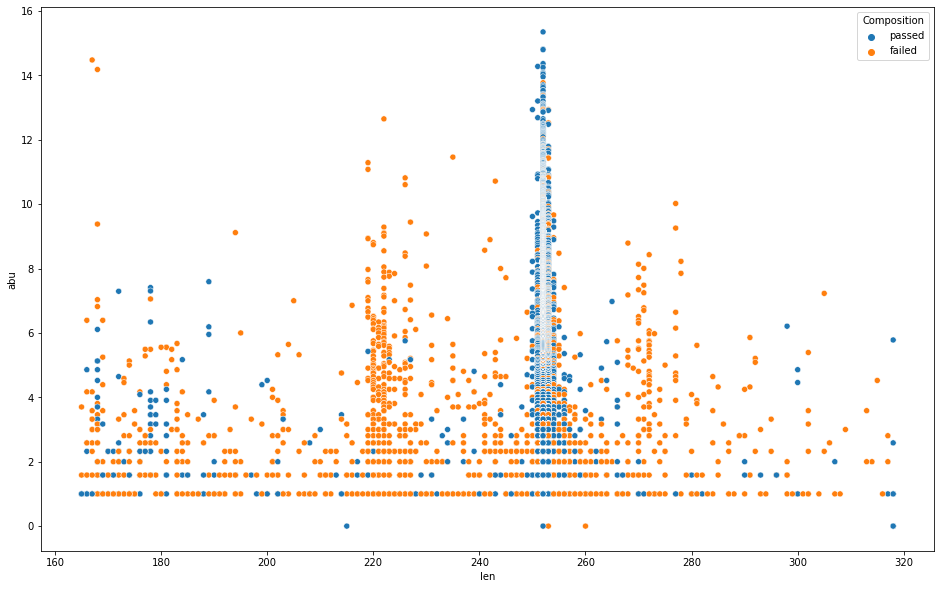

In [71]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_mix,
    x='len',
    y='abu',
    hue='Composition'
)

<AxesSubplot:xlabel='len', ylabel='abu'>

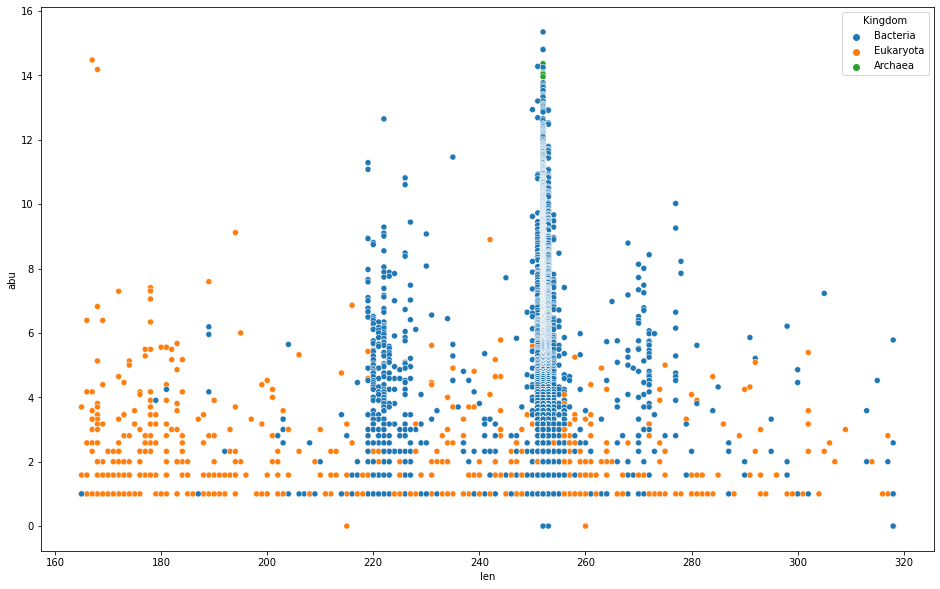

In [72]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_mix,
    x='len',
    y='abu',
    hue='Kingdom'
)

<AxesSubplot:xlabel='len', ylabel='abu'>

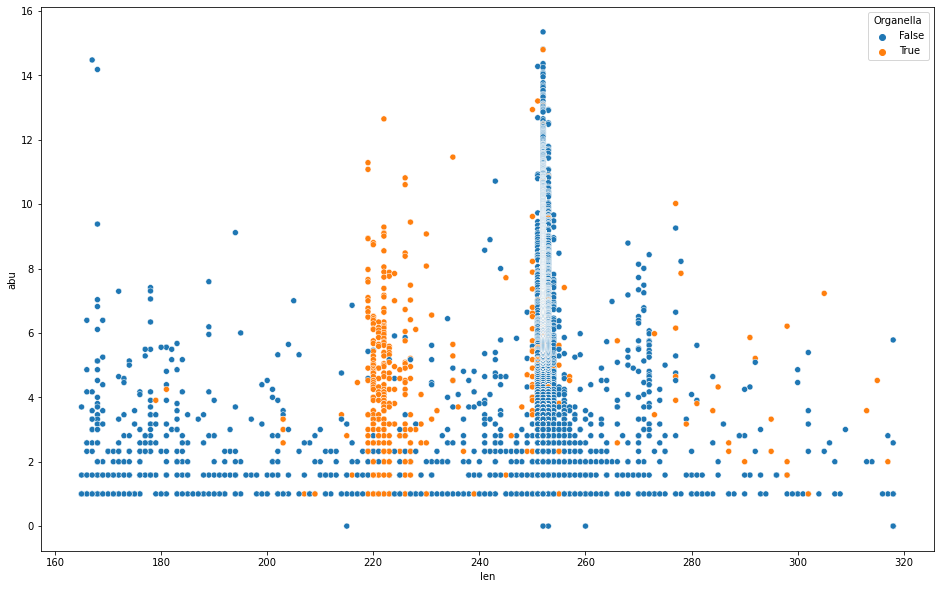

In [87]:
df_mix['Organella'] = np.where(((df_mix['Order']=="Chloroplast") |
                            (df_mix['Family']=="Mitochondria")) ,True, False)
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_mix,
    x='len',
    y='abu',
    hue='Organella'
)

<AxesSubplot:xlabel='len', ylabel='abu'>

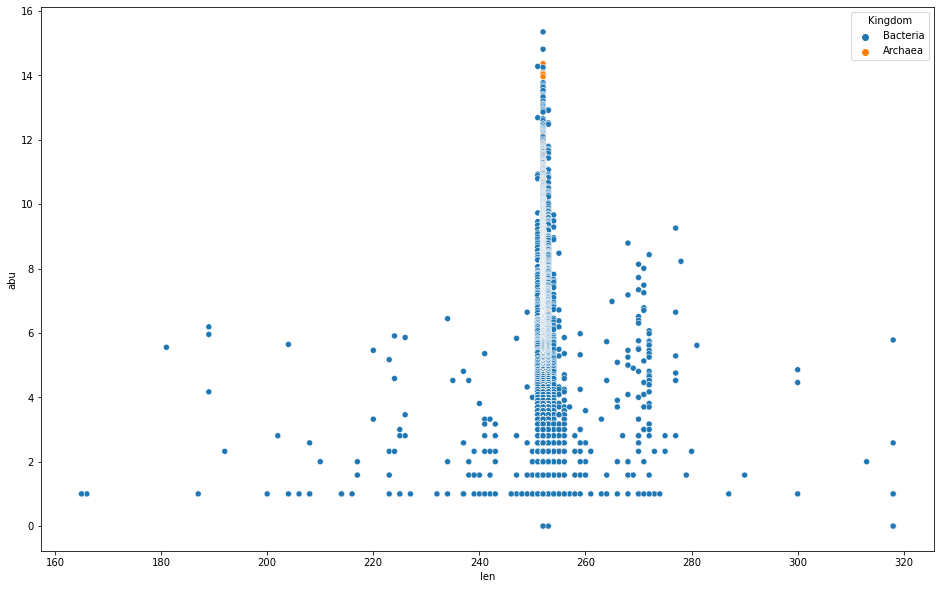

In [100]:
df_right = df_mix.query('Organella==False & Kingdom!="Eukaryota"')

plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_right,
    x='len',
    y='abu',
    hue='Kingdom'
)

<AxesSubplot:xlabel='len', ylabel='Phylum'>

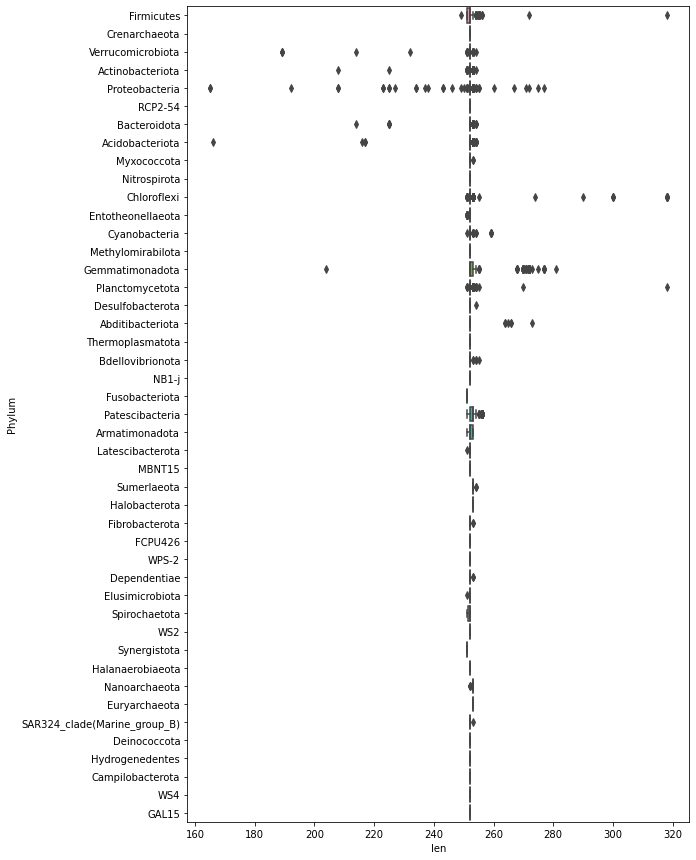

In [102]:
plt.figure(figsize=(9, 15))
sns.boxplot(data=df_right, orient="h", y='Phylum', x='len')`

<AxesSubplot:xlabel='len', ylabel='abu'>

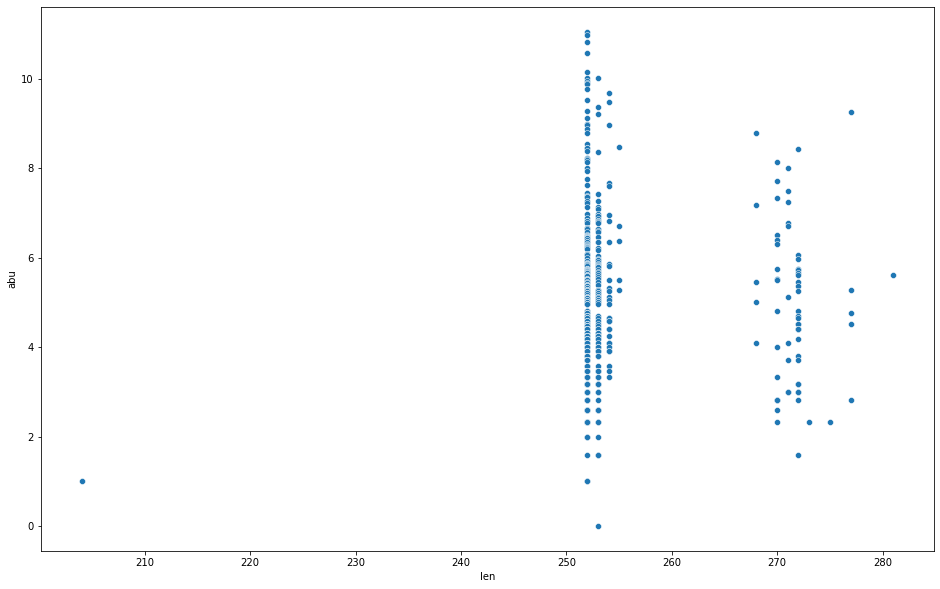

In [109]:
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=df_right.query('Phylum == "Gemmatimonadota"'),
    x='len',
    y='abu'
)

LC_ALL=C.UTF-8 R